In [3]:
!pip install python-Levenshtein


  Using cached https://files.pythonhosted.org/packages/42/a9/d1785c85ebf9b7dfacd08938dd028209c34a0ea3b1bcdb895208bd40a67d/python-Levenshtein-0.12.0.tar.gz
  Running setup.py bdist_wheel for python-Levenshtein ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import Levenshtein as L

In [22]:
from google.colab import files
Andre = files.upload()


Saving deid-Andre_Holder.py to deid-Andre_Holder (1).py


In [23]:
from google.colab import files
ChenLin = files.upload()

Saving deid-ChenLin.py to deid-ChenLin (2).py


In [24]:
from google.colab import files
FeverDreams = files.upload()

Saving deid_phone.py to deid_phone.py


In [159]:
from google.colab import files
Itoshikihiro = files.upload()

Saving deid-date-Jie.py to deid-date-Jie.py


In [162]:
from google.colab import files
Mahmoud = files.upload()

Saving deid_age_mahmoud.py to deid_age_mahmoud (2).py


In [163]:
from google.colab import files
Nasim = files.upload()

Saving de-id-age.py to de-id-age.py


In [164]:
from google.colab import files
Parisa = files.upload()

Saving deid_Date_Parisa.py to deid_Date_Parisa.py


In [165]:
from google.colab import files
Shaojun = files.upload()

Saving deid-Shaojun Yu.py to deid-Shaojun Yu.py


In [170]:
import pandas as pd
import os
import re
file_path="de-id_codes"
Name_of_Codes_list=[]
writer=['Andre','ChenLin','FeverDreams','Mahmoud','Nasim','Parisa','Shaojun']
#,,
Python_Codes={'Andre':Andre.values(),'ChenLin':ChenLin.values(),'FeverDreams':FeverDreams.values()
             ,'Mahmoud':Mahmoud,'Nasim':Nasim,'Parisa':Parisa,'Shaojun':Shaojun}

#print(Python_Codes)
print(type(Python_Codes['Andre']))


<class 'dict_values'>


In [0]:
import numpy
#imilarities=numpy.array([[0,0,0],[0,0,0],[0,0,0]])
Similarities_Jaro= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)
Similarities_distance= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)
Similarities_jaro_winkler= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)
Similarities_ratio= np.zeros((len(Python_Codes),len(Python_Codes)), dtype=np.float32)


i=-1;j=-1
for key1 in Python_Codes.keys():
  i+=1
  j=-1
  for key2 in Python_Codes.keys():
    j+=1
    str1=str(list(Python_Codes[key1]))
    str2=str(list(Python_Codes[key2]))
    #rint(type(str2))
    #rint(L.jaro(str1,str2))
    Similarities_Jaro[i][j]=L.jaro(str1,str2)# Jaro string similarity metric
    Similarities_distance[i][j]=L.distance(str1,str2)# Absolute Levenshtein distance
    Similarities_jaro_winkler[i][j]=L.jaro_winkler(str1,str2)# Jaro-Winkler string similarity
    Similarities_ratio[i][j]=L.ratio(str1,str2)# Similarity of two strings



**Jaro Similarity Metric Results:**

[[1.         0.5638947  0.78184444 0.395473   0.33777273 0.41759607
  0.40206063]
 [0.5638947  1.         0.5902005  0.37131768 0.33757898 0.3950855
  0.37724653]
 [0.78184444 0.5902005  1.         0.37171394 0.3377991  0.39552575
  0.37764278]
 [0.395473   0.37131768 0.37171394 1.         0.82789856 0.79710144
  0.75577515]
 [0.33777273 0.33757898 0.3377991  0.82789856 1.         0.79257244
  0.7626748 ]
 [0.41759607 0.3950855  0.39552575 0.79710144 0.79257244 1.
  0.68906456]
 [0.40206063 0.37724653 0.37764278 0.75577515 0.7626748  0.68906456
  1.        ]]


Text(0.5,1,'Jaro Metric')

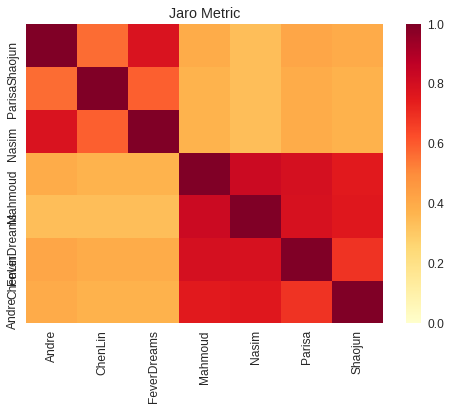

In [172]:
print(Similarities_Jaro)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_Jaro,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Jaro Metric")

** Absolute Levenshtein distance**

[[0.0000e+00 1.6293e+04 1.5950e+03 6.0880e+03 6.0950e+03 6.0880e+03
  6.0900e+03]
 [1.6293e+04 0.0000e+00 1.5776e+04 2.1079e+04 2.1086e+04 2.1079e+04
  2.1080e+04]
 [1.5950e+03 1.5776e+04 0.0000e+00 5.5490e+03 5.5560e+03 5.5490e+03
  5.5510e+03]
 [6.0880e+03 2.1079e+04 5.5490e+03 0.0000e+00 1.0000e+01 8.0000e+00
  1.1000e+01]
 [6.0950e+03 2.1086e+04 5.5560e+03 1.0000e+01 0.0000e+00 1.1000e+01
  1.0000e+01]
 [6.0880e+03 2.1079e+04 5.5490e+03 8.0000e+00 1.1000e+01 0.0000e+00
  1.2000e+01]
 [6.0900e+03 2.1080e+04 5.5510e+03 1.1000e+01 1.0000e+01 1.2000e+01
  0.0000e+00]]


Text(0.5,1,'Levenshtein Distance Metric')

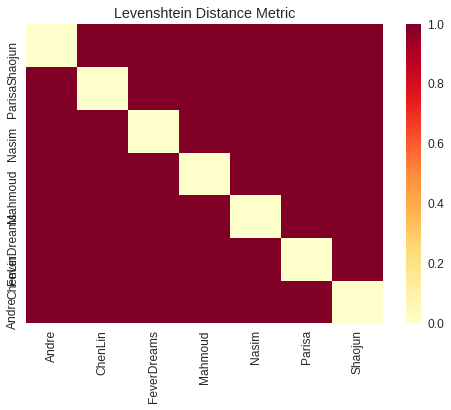

In [173]:
print(Similarities_distance)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_distance,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Levenshtein Distance Metric")

**Jaro-Winkler string similarity**

[[1.         1.         1.         0.4559257  0.40399545 0.47583646
  0.46185455]
 [1.         1.         1.         0.43418592 0.40382108 0.45557696
  0.43952188]
 [1.         1.         1.         0.43454254 0.4040192  0.45597318
  0.4398785 ]
 [0.4559257  0.43418592 0.43454254 1.         0.8967391  0.9391304
  0.9023101 ]
 [0.40399545 0.40382108 0.4040192  0.8967391  1.         0.8755435
  0.8576049 ]
 [0.47583646 0.45557696 0.45597318 0.9391304  0.8755435  1.
  0.87562585]
 [0.46185455 0.43952188 0.4398785  0.9023101  0.8576049  0.87562585
  1.        ]]


Text(0.5,1,'Jaro Wrinkler Metric')

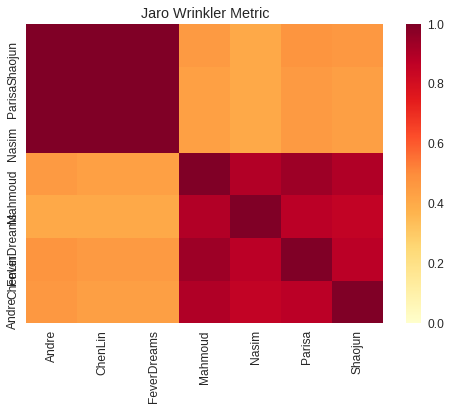

In [175]:
print(Similarities_jaro_winkler)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_jaro_winkler,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Jaro Wrinkler Metric")


**Similarity of two strings**

[[1.         0.37967148 0.8535479  0.00749918 0.00522278 0.00749918
  0.0068482 ]
 [0.37967148 1.         0.4076629  0.00217751 0.0015153  0.00217751
  0.00208294]
 [0.8535479  0.4076629  1.         0.00822163 0.00572656 0.00822163
  0.00750804]
 [0.00749918 0.00217751 0.00822163 1.         0.71794873 0.6956522
  0.62222224]
 [0.00522278 0.0015153  0.00572656 0.71794873 1.         0.6666667
  0.68421054]
 [0.00749918 0.00217751 0.00822163 0.6956522  0.6666667  1.
  0.53333336]
 [0.0068482  0.00208294 0.00750804 0.62222224 0.68421054 0.53333336
  1.        ]]


Text(0.5,1,'Ratio Metric')

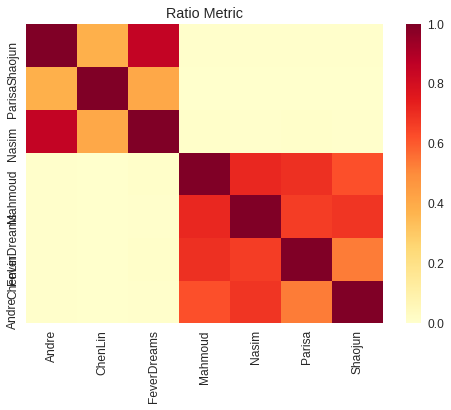

In [176]:
print(Similarities_ratio)    
sns.set(font_scale=1.2)
g = sns.heatmap(
    Similarities_ratio,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")

g.set_xticklabels(writer, rotation=90)
g.set_yticklabels(writer, rotation=90)
g.set_title("Ratio Metric")